In [1]:
import dask.dataframe as dd
import torch
from src.data.storage import dd_read_parquet
from src.data.config import DATASET

In [2]:
from torchvision import transforms

img_transform = transforms.Compose(
    [
        transforms.Resize(size=(224, 224)),
        transforms.ToTensor(),
        # transforms.Normalize(
        #     mean=[0.485, 0.456, 0.406],
        #     std=[0.229, 0.224, 0.225],
        # )
    ]
)

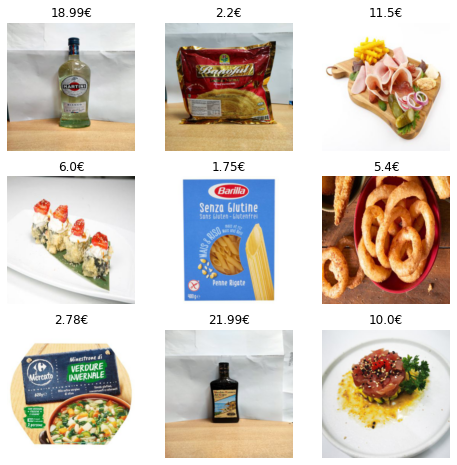

In [3]:
import matplotlib.pyplot as plt
from src.models.utils.data import FoodPricingDataset

training_data = FoodPricingDataset(
    img_transform=img_transform, txt_transform=lambda x: x, split="train"
)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    sample = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{sample['label'].numpy()[0] / 100}€")
    plt.axis("off")
    plt.imshow(sample["img"].permute(1, 2, 0))
plt.show()